# CREDIT CARD FRAUD DETECTION

### Importing the necessary libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

## Loading the dataset

In [38]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [39]:
df.shape

(284807, 31)

### Generating descriptive statistics

In [41]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

### Checking the data types of each column in the DataFrame

In [43]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Checking for missing values in the Dataset

In [45]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Finding the number of unique values in the 'Class' column

In [47]:
df['Class'].nunique()

2

### Counting the occurrences of each unique value in the 'Class' column

In [49]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# visualization

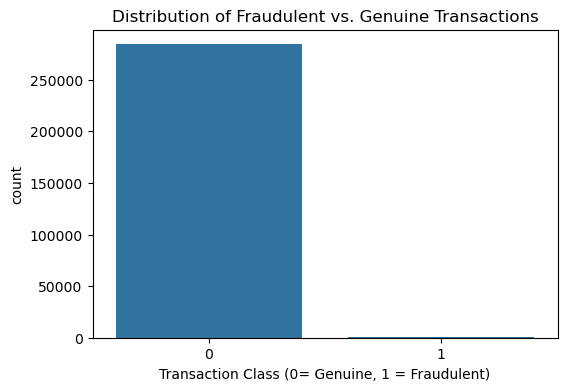

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs. Genuine Transactions')
plt.xlabel('Transaction Class (0= Genuine, 1 = Fraudulent)')
plt.ylabel('count')
plt.show()

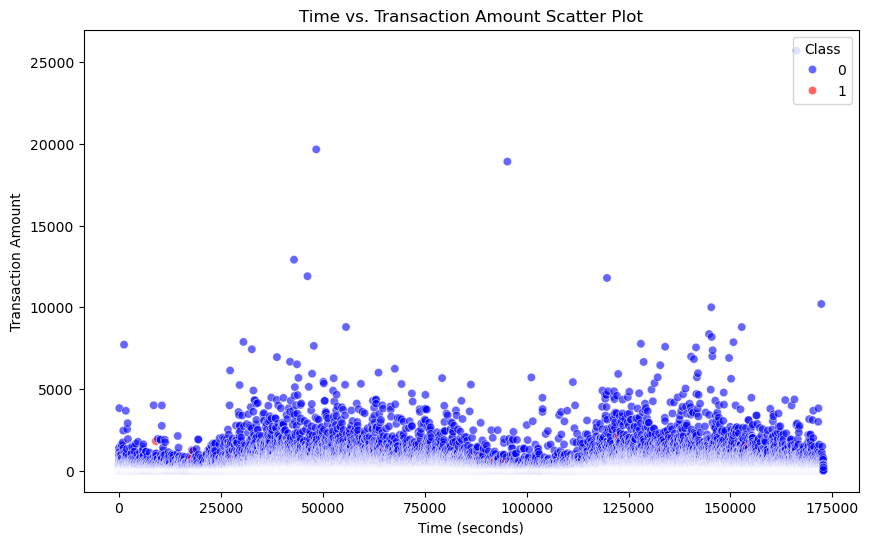

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Time vs. Transaction Amount Scatter Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.legend(title='Class', loc='upper right')
plt.show()

### Calculating and displaying the distribution of classes as percentages

In [55]:
class_distribution = df['Class'].value_counts(normalize=True)*100
print(class_distribution)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### Separating the dataset into fraudulent and normal transactions

In [65]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

### Generating descriptive statistics for the 'Amount' column in the fraudulent transactions

In [67]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Generating descriptive statistics for the 'Amount' column in the normal transactions

In [69]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### UnderSampling a subset of normal transactions

In [71]:
normal_sample = normal.sample(n=492)

### Combining the sampled normal transactions with all fraudulent transactions

In [79]:
sample = pd.concat([normal_sample, fraud], axis=0)

In [81]:
sample['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

### Calculating the mean of all numerical columns, grouped by 'Class'

In [84]:
sample.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94081.099593,-0.040362,0.033431,-0.032118,-0.091462,-0.049220,-0.096797,0.028741,-0.138587,0.008422,...,-0.040033,0.113376,-0.022828,0.028480,0.017507,-0.005969,-0.052225,0.016404,0.008458,89.281870
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Preparing feature and target variables for machine learning

In [87]:
x = sample.drop(columns = 'Class', axis = 1)
y = sample['Class']

In [89]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6246,7315.0,-1.184202,-0.114096,2.722166,-0.943479,-0.932892,-0.347729,0.350113,-0.025176,1.326938,...,0.439159,0.212241,0.464151,0.157338,0.410784,0.077858,1.367905,-0.129984,0.070206,179.40
217106,140764.0,2.138445,-1.787298,-0.220860,-1.733067,-1.576329,0.496230,-1.875595,0.205894,-0.947748,...,-0.228501,-0.047033,0.243231,0.260845,0.266335,-0.511047,-0.263175,0.051027,-0.026795,63.25
72518,54743.0,-0.552361,1.287218,1.518283,2.959506,0.247351,-0.485923,1.063683,-0.317103,-1.902399,...,0.233215,0.128361,0.386932,-0.055752,0.761023,-0.222497,0.154856,0.010147,0.183993,69.01
56106,47275.0,0.947917,-0.278615,1.307360,1.266138,-0.865660,0.504611,-0.647025,0.335047,0.568582,...,-0.034191,0.066107,0.283553,-0.012933,0.244520,0.273801,-0.416254,0.076853,0.036810,63.60
215771,140217.0,1.901608,-0.319896,-0.296786,1.190715,-0.502346,0.018090,-0.641814,0.248811,0.961145,...,-0.342643,-0.149642,-0.435342,0.336656,-0.519203,-0.442270,-0.928594,0.043461,-0.040613,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [91]:
y

6246      0
217106    0
72518     0
56106     0
215771    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

## Splitting the dataset into training and testing sets

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [96]:
print(x_train.shape)
print(y_train.shape)

(787, 30)
(787,)


### Initializing a Logistic Regression model with a maximum of 10,000 iterations

In [99]:
model = LogisticRegression(max_iter=10000)

### Training the Logistic Regression model on the training data

In [102]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

###  Making predictions on the training data

In [105]:
prediction = model.predict(x_train)
print(prediction)

[0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 

## Calculating evaluation metrics for the model's predictions

In [108]:
accuracy = accuracy_score(y_train, prediction)
precision = precision_score(y_train, prediction)
recall = recall_score(y_train, prediction)
f1 = f1_score(y_train, prediction)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9504
Precision: 0.9865
Recall: 0.9148
F1-Score: 0.9493


### Making predictions on the test data

In [110]:
test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)

In [112]:
test_accuracy

0.9593908629441624

## Plotting the Confusion Matrix of Model Predictions on Training Data

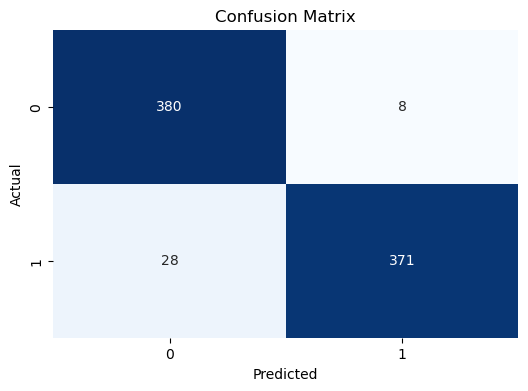

In [73]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, prediction)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
